# **Problem Statement**

##Context

In the realm of modern finance, businesses encounter the perpetual challenge of managing debt obligations effectively to maintain a favorable credit standing and foster sustainable growth. Investors keenly scrutinize companies capable of navigating financial complexities while ensuring stability and profitability. A pivotal instrument in this evaluation process is the balance sheet, which provides a comprehensive overview of a company's assets, liabilities, and shareholder equity, offering insights into its financial health and operational efficiency. In this context, leveraging available financial data, particularly from preceding fiscal periods, becomes imperative for informed decision-making and strategic planning.

##Objective

A group of venture capitalists want to develop a Financial Health Assessment Tool. With the help of the tool, it endeavors to empower businesses and investors with a robust mechanism for evaluating the financial well-being and creditworthiness of companies. By harnessing machine learning techniques, they aim to analyze historical financial statements and extract pertinent insights to facilitate informed decision-making via the tool. Specifically, they foresee facilitating the following with the help of the tool:

* Debt Management Analysis: Identify patterns and trends in debt management practices to assess the ability of businesses to fulfill financial obligations promptly and efficiently, and identify potential cases of default.
* Credit Risk Evaluation: Evaluate credit risk exposure by analyzing liquidity ratios, debt-to-equity ratios, and other key financial indicators to ascertain the likelihood of default and inform investment decisions.

They have hired you as a data scientist and provided you with the financial metrics of different companies. The task is to analyze the data provided and develop a predictive model leveraging machine learning techniques to identify whether a given company will be tagged as a defaulter in terms of net worth next year. The predictive model will help the organization anticipate potential challenges with the financial performance of the companies and enable proactive risk mitigation strategies.

##Data Description


The data consists of financial metrics from the balance sheets of different companies. The detailed data dictionary is given below.

* Networth Next Year: Net worth of the customer in the next year
* Total assets: Total assets of customer
* Net worth: Net worth of the customer of the present year
* Total income: Total income of the customer
* Change in stock: Difference between the current value of the stock and the value of stock in the last trading day
* Total expenses: Total expenses done by the customer
* Profit after tax: Profit after tax deduction
* PBDITA: Profit before depreciation, income tax, and amortization
* PBT: Profit before tax deduction
* Cash profit: Total Cash profit
* PBDITA as % of total income: PBDITA / Total income
* PBT as % of total income: PBT / Total income
* PAT as % of total income: PAT / Total income
* Cash profit as % of total income: Cash Profit / Total income
* PAT as % of net worth: PAT / Net worth
* Sales: Sales done by the customer
* Income from financial services: Income from financial services
* Other income: Income from other sources
* Total capital: Total capital of the customer
* Reserves and funds: Total reserves and funds of the customer
* Borrowings: Total amount borrowed by the customer
* Current liabilities & provisions: current liabilities of the customer
* Deferred tax liability: Future income tax customer will pay because of the current transaction
* Shareholders funds: Amount of equity in a company which belongs to shareholders
* Cumulative retained profits: Total cumulative profit retained by customer
* Capital employed: Current asset minus current liabilities
* TOL/TNW: Total liabilities of the customer divided by Total net worth
* Total term liabilities / tangible net worth: Short + long term liabilities divided by tangible net worth
* Contingent liabilities / Net worth (%): Contingent liabilities / Net worth
* Contingent liabilities: Liabilities because of uncertain events
* Net fixed assets: The purchase price of all fixed assets
* Investments: Total invested amount
* Current assets: Assets that are expected to be converted to cash within a year
* Net working capital: Difference between the current liabilities and current assets
* Quick ratio (times): Total cash divided by current liabilities
* Current ratio (times): Current assets divided by current liabilities
* Debt to equity ratio (times): Total liabilities divided by its shareholder equity
* Cash to current liabilities (times): Total liquid cash divided by current liabilities
* Cash to average cost of sales per day: Total cash divided by the average cost of the sales
* Creditors turnover: Net credit purchase divided by average trade creditors
* Debtors turnover: Net credit sales divided by average accounts receivable
* Finished goods turnover: Annual sales divided by average inventory
* WIP turnover: The cost of goods sold for a period divided by the average inventory for that period
* Raw material turnover: Cost of goods sold is divided by the average inventory for the same period
* Shares outstanding: Number of issued shares minus the number of shares held in the company
* Equity face value: cost of the equity at the time of issuing
* EPS: Net income divided by the total number of outstanding share
* Adjusted EPS: Adjusted net earnings divided by the weighted average number of common shares outstanding on a diluted basis during the plan year
* Total liabilities: Sum of all types of liabilities
* PE on BSE: Company's current stock price divided by its earnings per share


Note: A company will not be tagged as a defaulter if its net worth next year is positive, or else, it'll be tagged as a defaulter.

# **Importing the necessary libraries**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV    # Train test Split and Grid Search
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as SM
from sklearn import metrics

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }<\style>'))

# **Loading the dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Read the data
df = pd.read_csv('/content/drive/MyDrive/PGPDSA/Comp_Fin_Data.csv')
#returns first 5 rows
df.head(5)

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


# **Data Overview**

###1. Structure of Data

In [5]:
df.shape

(4256, 51)

###2. Type of Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

###3. Missing values check

In [7]:
df.isnull().sum()

,0
Num,0
Networth Next Year,0
Total assets,0
Net worth,0
Total income,231
Change in stock,550
Total expenses,165
Profit after tax,154
PBDITA,154
PBT,154


###4. Data Duplicates

In [8]:
df.duplicated().sum()

0

###5. Column Renaming

In [9]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [10]:
df.columns

Index(['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth',
       'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income',
       'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income',
       'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth',
       'Sales', 'Income_from_fincial_services', 'Other_income',
       'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_&_provisions', 'Deferred_tax_liability',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times',
       'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times',
       '

###6. Statistical Summary

In [11]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num,4256.00,2128.50,1228.75,1.00,1064.75,2128.50,3192.25,4256.00
Networth_Next_Year,4256.00,1344.74,15936.74,-74265.60,3.98,72.10,330.82,805773.40
Total_assets,4256.00,3573.62,30074.44,0.10,91.30,315.50,1120.80,1176509.20
Net_worth,4256.00,1351.95,12961.31,0.00,31.48,104.80,389.85,613151.60
Total_income,4025.00,4688.19,53918.95,0.00,107.10,455.10,1485.00,2442828.20
Change_in_stock,3706.00,43.70,436.92,-3029.40,-1.80,1.60,18.40,14185.50
Total_expenses,4091.00,4356.30,51398.09,-0.10,96.80,426.80,1395.70,2366035.30
Profit_after_tax,4102.00,295.05,3079.90,-3908.30,0.50,9.00,53.30,119439.10
PBDITA,4102.00,605.94,5646.23,-440.70,6.93,36.90,158.70,208576.50
PBT,4102.00,410.26,4217.42,-3894.80,0.80,12.60,74.17,145292.60


##Insights

1. Financial Stability and Performance
* Net Worth & Assets:
The average net worth is 1,351.95K, but there's a high standard deviation (12,961.31K), indicating significant variation among companies.
Total assets range widely, with an average of 3,573.62K, but some companies have minimal assets (0.10K).
* Liabilities & Borrowings:
Borrowings have a mean of 1,176.25K, with some companies having debt as high as 278,257.30K.
Debt-to-Equity Ratio averages 2.87, meaning companies rely significantly on borrowed capital.
* Cash Position & Liquidity:
The quick ratio (1.50) and current ratio (2.26) suggest that most companies have enough short-term assets to cover liabilities.
However, cash to current liabilities (0.53) is relatively low, meaning cash reserves might not be strong enough for immediate obligations.
2. Profitability & Revenue
* Revenue & Profitability:
Total income varies widely, averaging 4,688.19K, but some firms have income as high as 2,442,828.20K.
* Profit after tax (PAT) has a mean of 295.05K but a high standard deviation (3,079.90K), showing some firms are significantly more profitable than others.
PAT as a percentage of net worth is 10.17%, meaning firms, on average, generate decent returns.
* Margins:
PBDITA as % of Total Income (3.18%) suggests operating profit margins are thin for most firms.
PBT as % of Total Income (-18.20%) indicates that many companies are struggling to generate pre-tax profits.
3. Stock Market & Valuation
* Earnings Per Share (EPS):
Average EPS is negative (-196.22), suggesting that a large portion of companies are unprofitable.
Adjusted EPS is similar (-197.53), reinforcing the trend.
* PE Ratio (Price to Earnings on BSE):
The mean PE ratio is 55.46, but the extremely high standard deviation (1,304.45) suggests that valuation multiples are all over the place, with some companies being significantly overvalued or undervalued.
4. Working Capital & Efficiency
* Inventory & Receivables Turnover:
Finished goods turnover (84.37) and WIP turnover (28.68) suggest inventory is moving quickly.
Debtors turnover (17.93) suggests that companies are efficient in collecting payments.
* Working Capital:
Net working capital is positive (162.87K), meaning firms generally have more current assets than liabilities.
5. Risk & Contingent Liabilities
* Contingent Liabilities:
Contingent liabilities as % of net worth is 55.71%, meaning that many companies face potential off-balance-sheet risks.
Some companies have extraordinarily high contingent liabilities (up to 14,704.27% of net worth).

Dropping Index column

In [12]:
df = df.drop(['Num'], axis = 1)

###Creating Binary target variable

In [13]:
df['default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)

Remove this column after deriving the default column

In [14]:
df = df.drop(['Networth_Next_Year'], axis = 1)

In [15]:
df

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,default
0,827.60,336.50,534.10,13.50,508.70,38.90,124.40,64.60,95.20,23.29,...,3.99,3.37,14.87,8760056.00,10.00,4.44,4.44,827.60,NaN,0
1,67.70,24.30,137.90,-3.70,131.00,3.20,5.50,1.00,3.80,3.99,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.70,NaN,0
2,238.40,78.90,331.20,-18.10,309.20,3.90,25.80,10.50,9.40,7.79,...,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.40,NaN,0
3,6883.50,1443.30,8448.50,212.20,8482.40,178.30,418.40,185.10,178.00,4.95,...,18.14,18.62,11.11,10000000.00,10.00,17.60,17.60,6883.50,NaN,0
4,90.90,47.00,388.60,3.40,392.70,-0.70,7.20,-0.60,3.90,1.85,...,45.87,28.67,19.93,107315.00,100.00,-6.52,-6.52,90.90,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,0.40,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.40,NaN,0
4252,159.60,86.70,172.90,0.10,169.70,3.30,18.40,3.70,12.60,10.64,...,11.00,8.28,9.88,8162700.00,10.00,0.42,0.42,159.60,16.81,0
4253,833.80,664.60,2314.70,32.10,2151.60,195.20,348.40,303.00,219.50,15.05,...,59.28,31.14,9.87,7479762.00,10.00,26.58,26.58,833.80,5.69,0
4254,95.00,48.50,110.50,4.60,113.50,1.60,9.70,2.60,6.70,8.78,...,78.99,11.51,14.95,NaN,NaN,0.00,0.00,95.00,NaN,0


In [21]:
df['default'].value_counts()

,count
default,
0,3352
1,904


###Proportion of Default

In [22]:
df['default'].value_counts(normalize = True)

,proportion
default,
0,0.79
1,0.21


# **Exploratory Data Analysis**

###Univariate Analysis

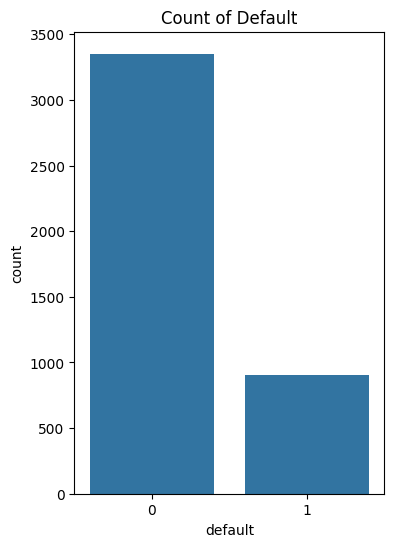

In [23]:
#Plotting a countplot for the target variable
plt.figure(figsize=(4, 6))
sns.countplot(x = "default", data = df)
plt.title('Count of Default')
plt.show()

In [326]:
#Percentage of defaulters
(df.default.sum()/len(df)) * 100

21.2406015037594

In [ ]:
#Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout()
    plt.title(variable)

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.histplot(data=df, x=variable)
    plt.tight_layout()
    plt.title(variable)

####Insights

1. Presence of Significant Outliers
* Many variables, such as Net Worth, Total Assets, Borrowings, and EPS, exhibit extreme outliers.
* This suggests data skewness and the need for outlier treatment before modeling.
* Recommendation: Use winsorization or log transformation to manage extreme values.
2. High Variability in Key Financial Indicators
* PBT (Profit Before Tax), PAT (Profit After Tax), EBITDA, and Total Income show large spread, indicating high variance across companies.
* Implication: Some companies are highly profitable, while others struggle with low or negative earnings.
* Recommendation: Further segmentation is needed to understand what drives this disparity (e.g., industry-specific trends).
3. Liquidity & Solvency Ratios Show Extreme Variability
* Debt-to-Equity Ratio, Quick Ratio, and Current Ratio display heavy-tailed distributions.
* Some companies have very high leverage, which increases financial risk.
* Recommendation: Companies with excessively high debt-to-equity should focus on debt restructuring or boosting equity.
4. Turnover Ratios Show Heavy-Tailed Distribution
* Debtors Turnover, Finished Goods Turnover, WIP Turnover, and Raw Material Turnover show significant dispersion.
* This indicates operational inefficiencies in some firms while others manage assets efficiently.
* Recommendation: Improve inventory and receivables management to optimize working capital.
5. Negative & Extreme Values in Key Profitability Metrics
* Some profitability metrics (e.g., PAT %, EBITDA %) have negative values, indicating loss-making companies.
* Implication: Certain businesses are struggling with operational inefficiencies or financial distress.
* Recommendation: Perform a deep dive into loss-making firms to identify underlying causes.

###Bivariate Analysis

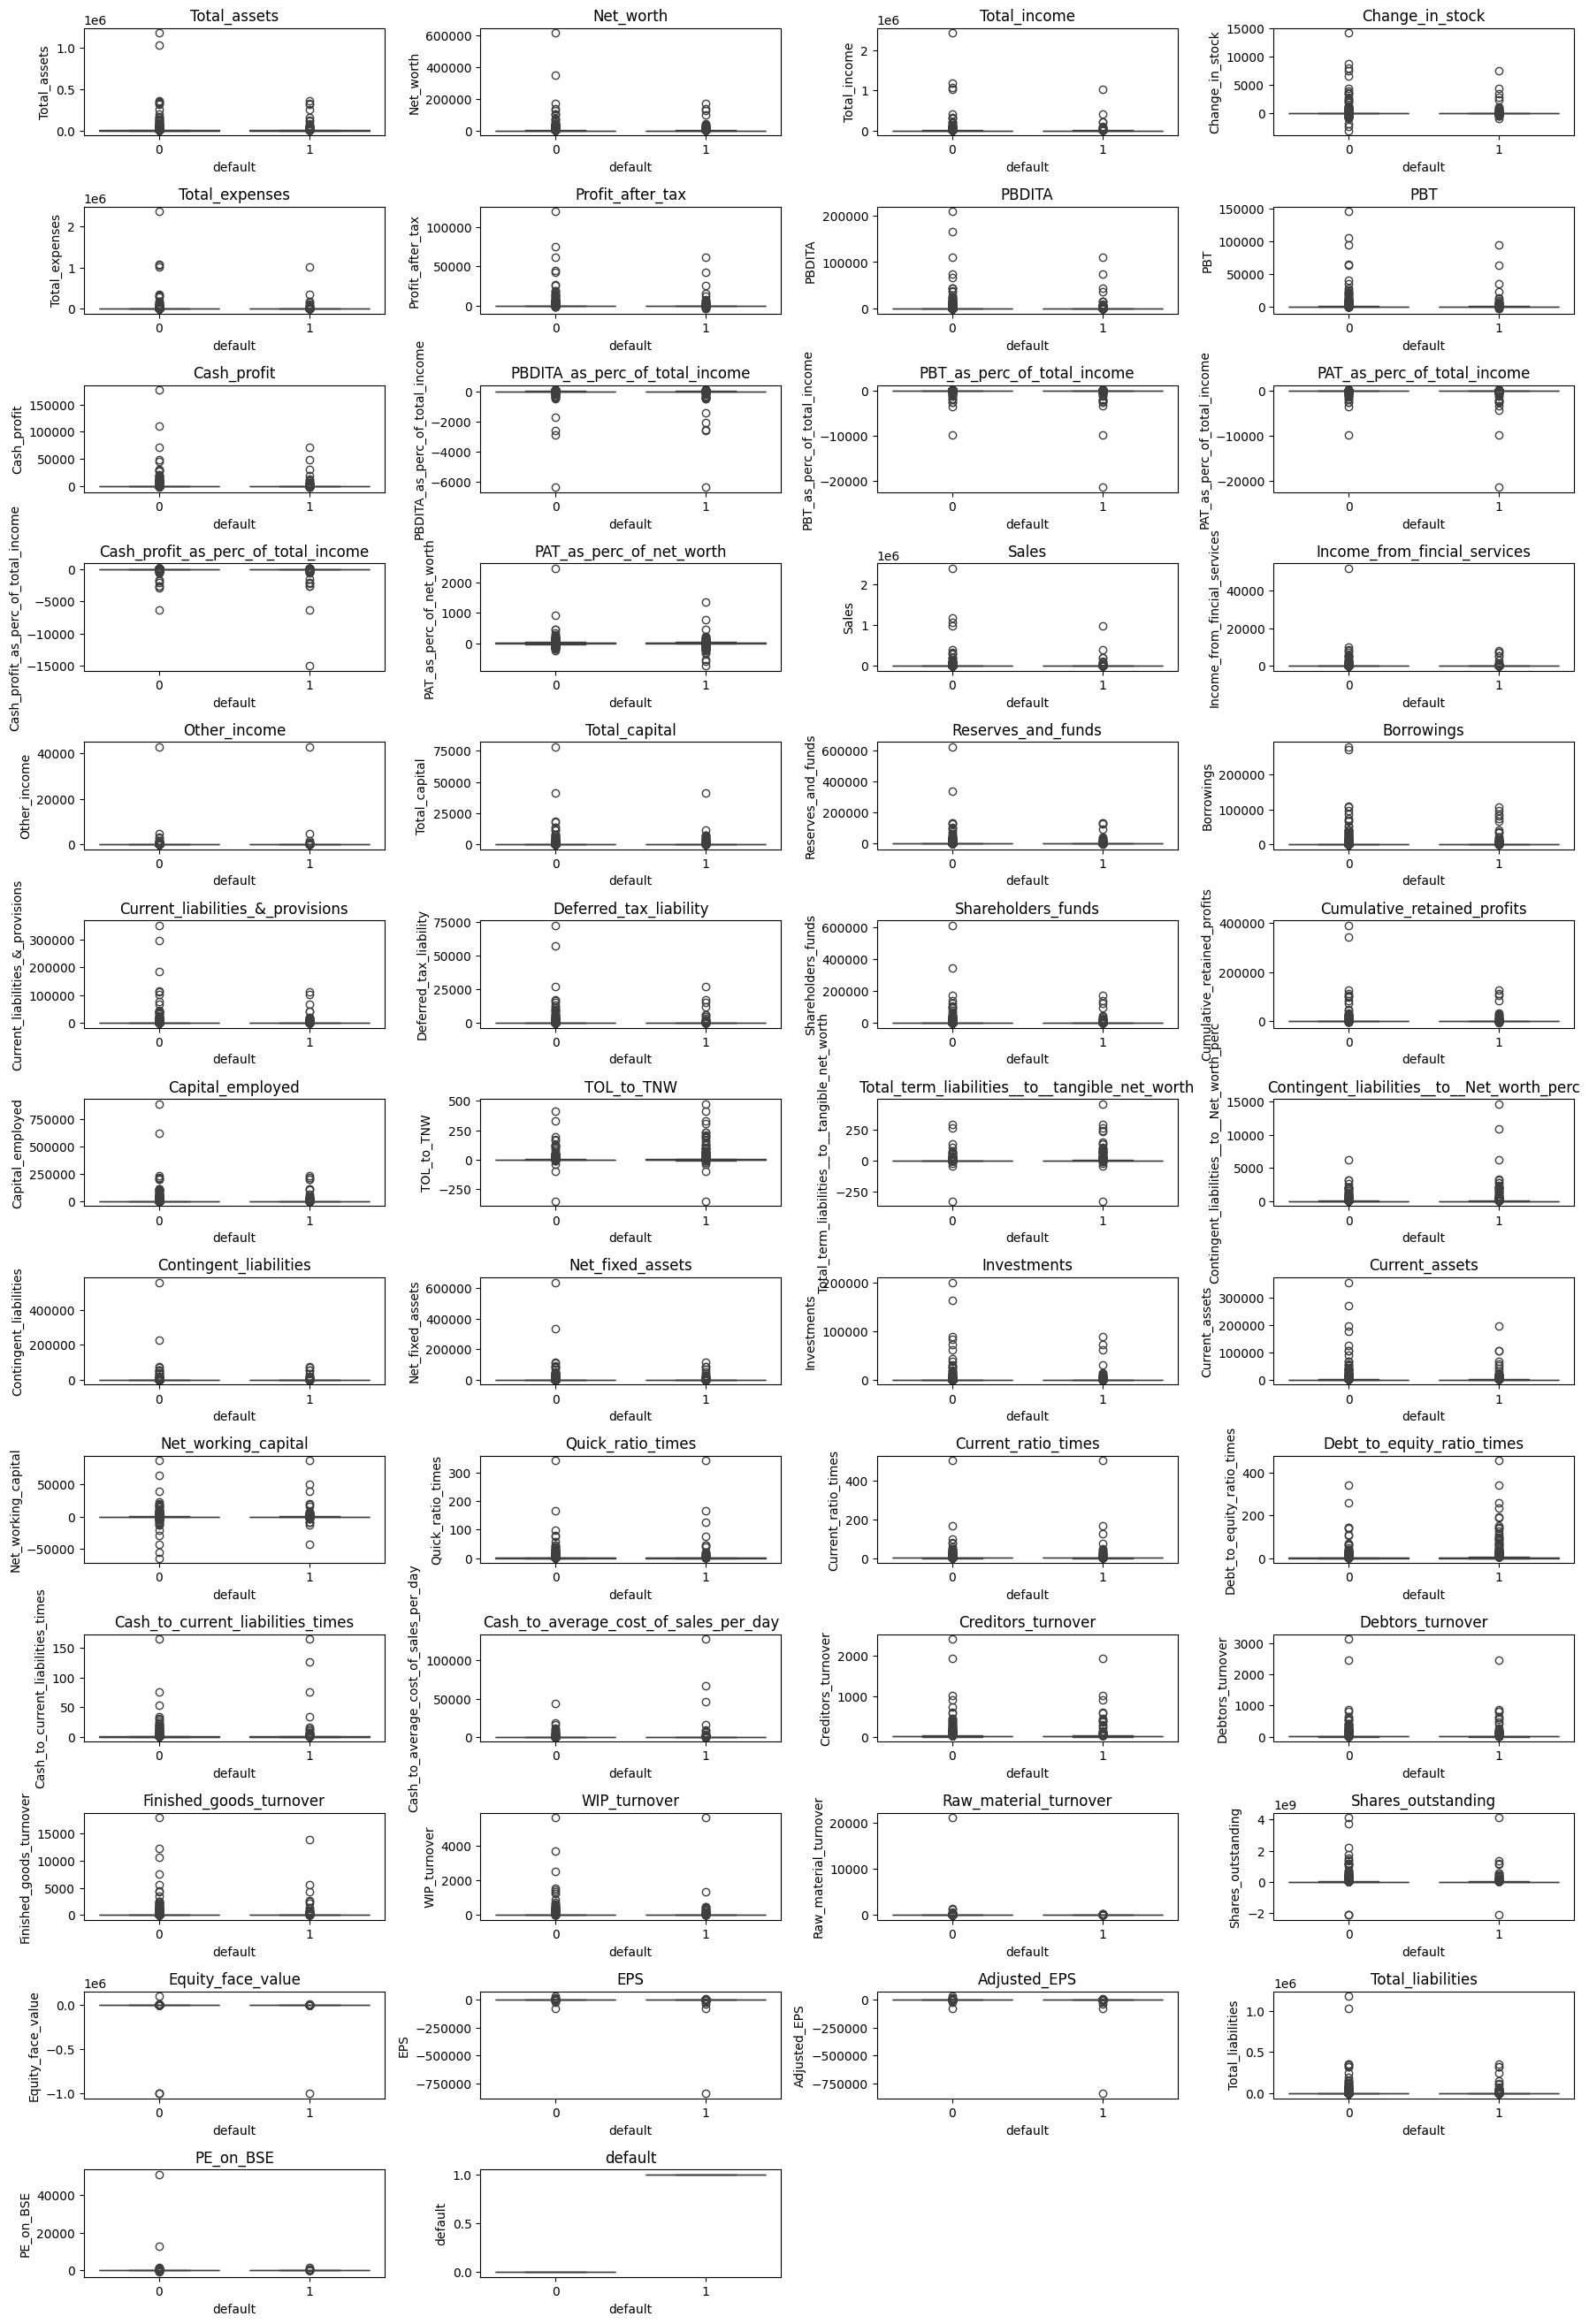

In [18]:
#Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(x=df["default"], y=df[variable])
    plt.tight_layout()
    plt.title(variable)

Correlation matrix

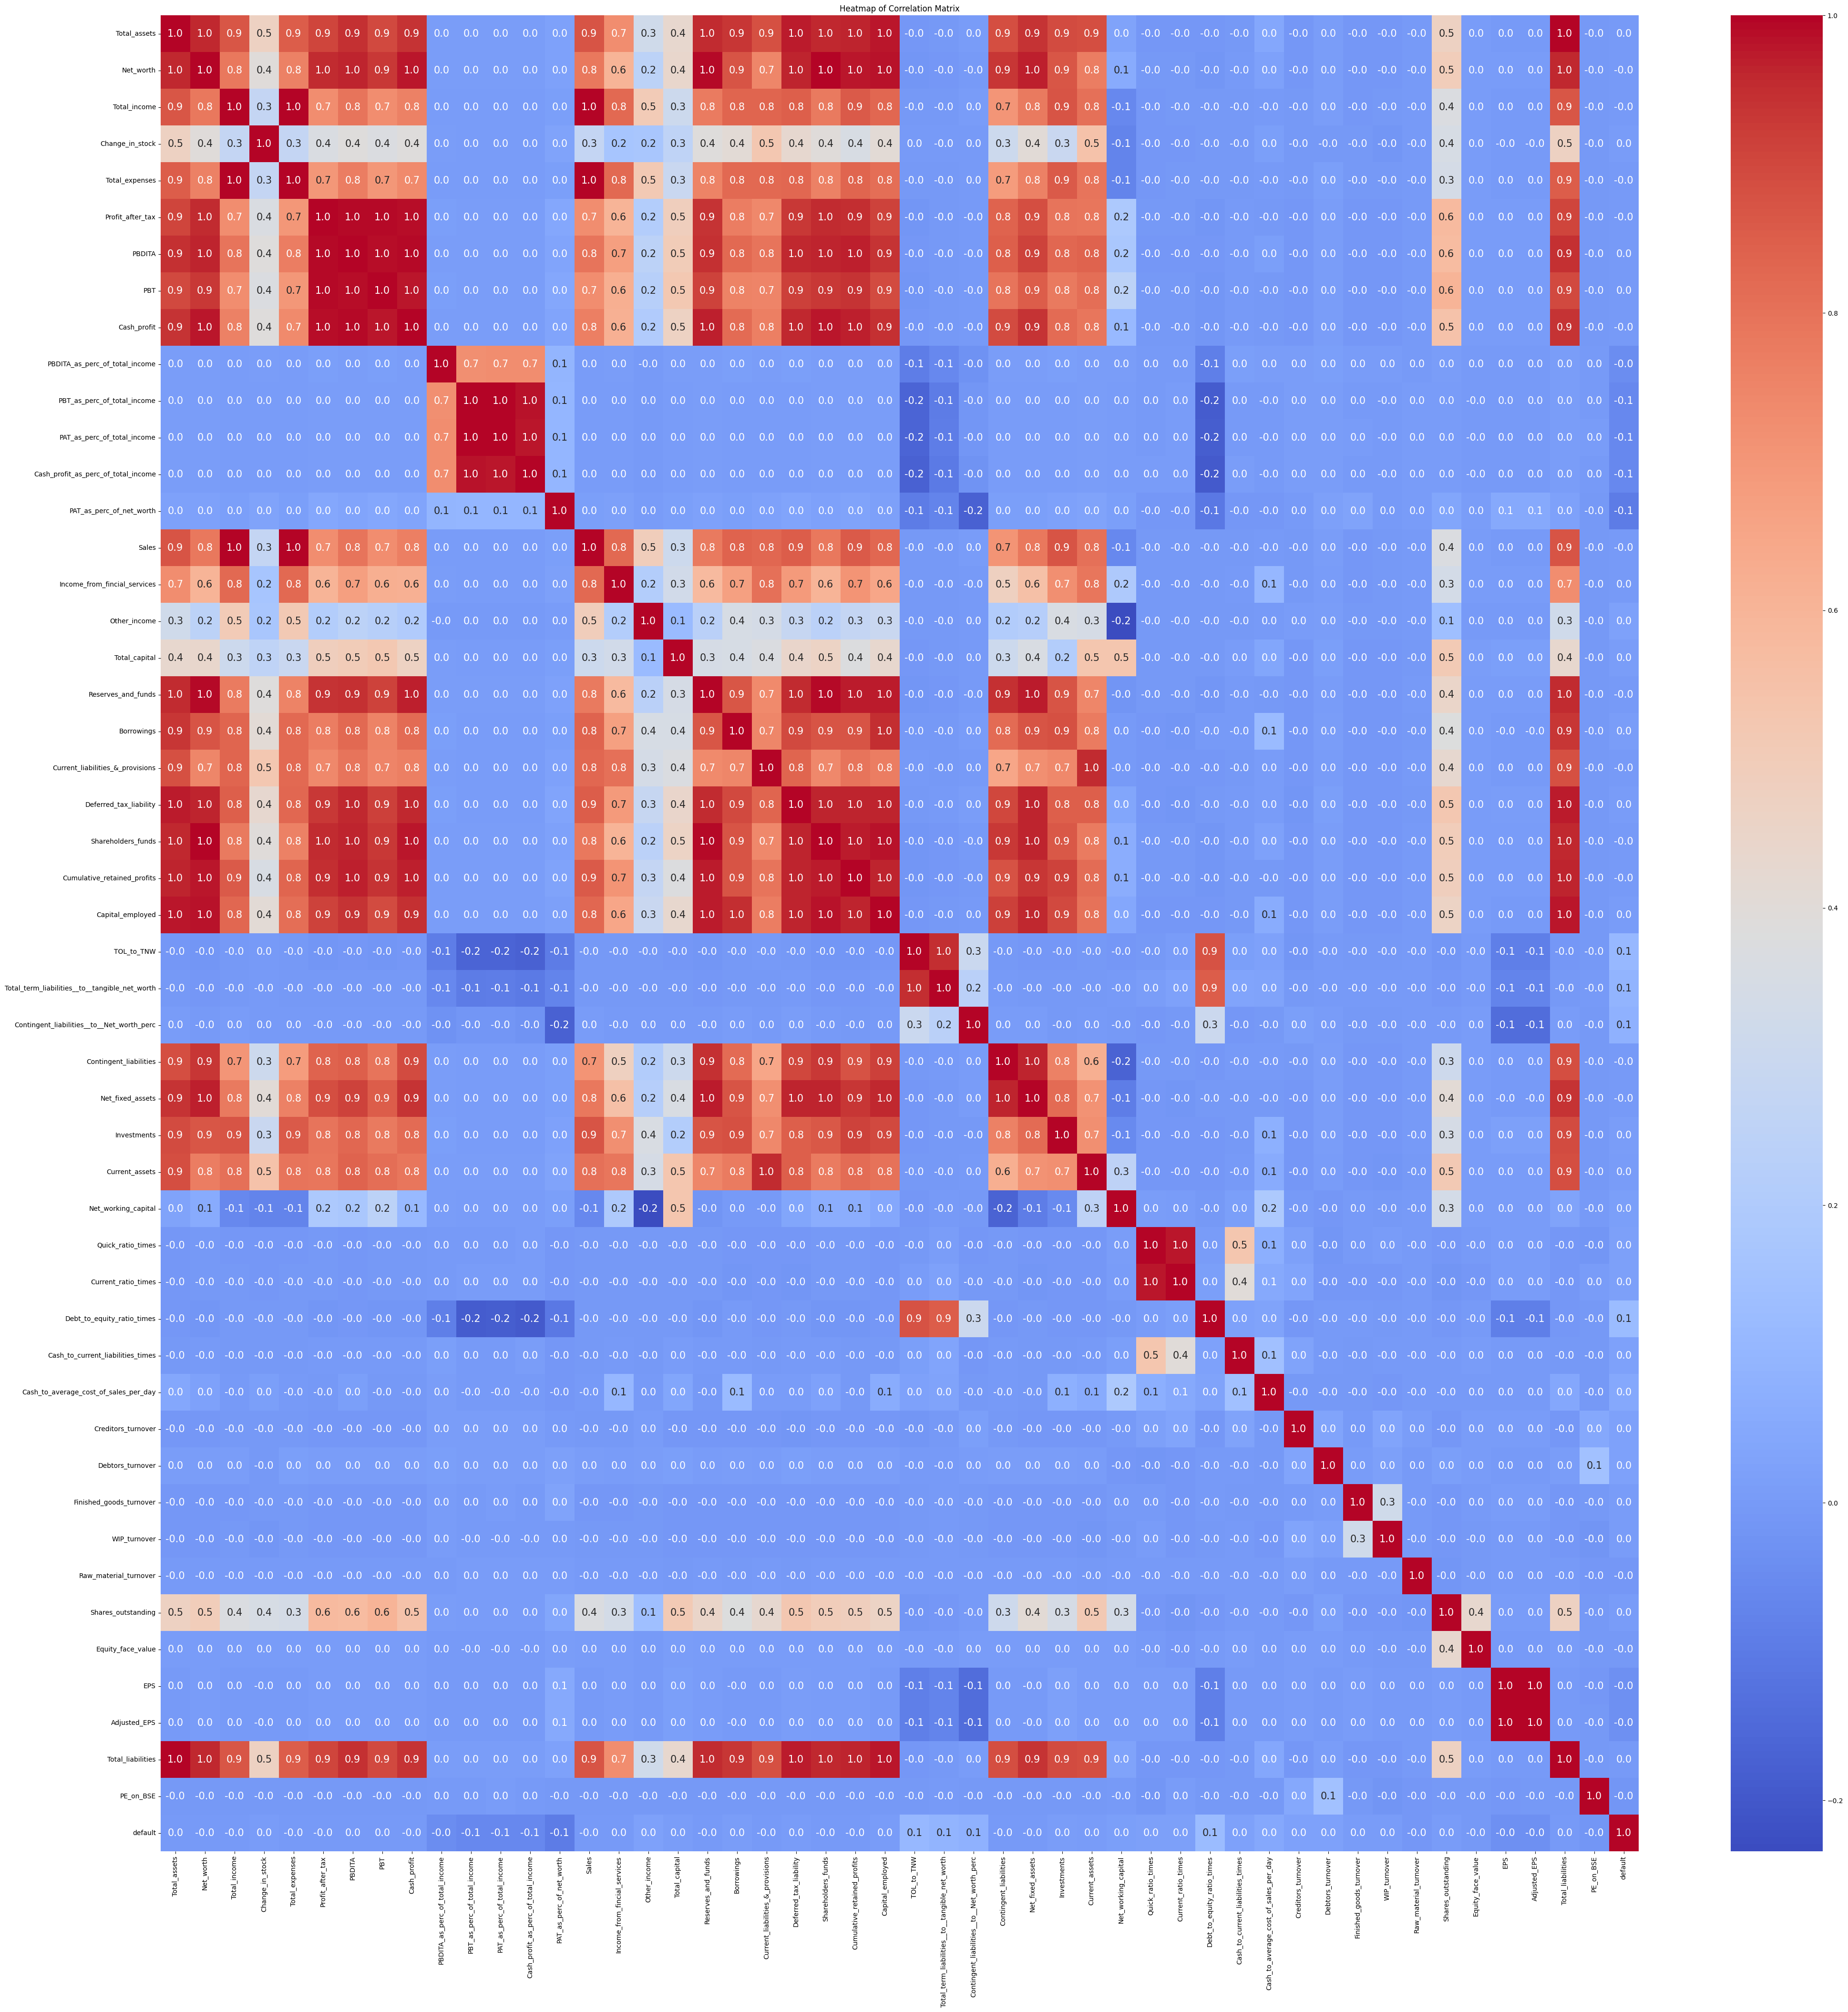

In [19]:
corr_matrix = df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 15})
plt.title('Heatmap of Correlation Matrix')
plt.show()

####Insights

*	Higher Total Assets & Net Worth in Non-Defaulters:
Non-defaulters generally have higher total assets and net worth, indicating financial stability.
*	Debt-to-Equity Ratio is Higher in Defaulters:
Defaulters tend to have higher debt-to-equity ratios, suggesting over-leverage and financial risk.
*	Lower Quick Ratio & Current Ratio in Defaulters:
Defaulters show lower liquidity ratios, meaning they may struggle with short-term obligations.
*	Higher Contingent Liabilities for Defaulters:
Companies that default tend to have higher contingent liabilities, indicating additional financial stress.
*	Cash Flow Metrics Show Variability:
Cash profit as a percentage of total income varies significantly, with some defaulters having extreme negative values.


* Highly Correlated Features:
Some variables have strong positive correlations (close to +1), suggesting they move together. For example:
PBT as % of total income and PAT as % of total income
Total assets and Net worth
Current ratio times and Quick ratio times
These features might contain redundant information and could be considered for feature reduction using PCA or Variance Inflation Factor (VIF).
* Negative Correlations:
Some variables have strong negative correlations (close to -1), indicating inverse relationships.
Debt-to-equity ratio times and Net worth
Contingent liabilities to net worth percentage and Total term liabilities to tangible net worth
These insights suggest that as debt increases, net worth tends to decrease, which is expected in financial analysis.
* Weak Correlations:
Several features exhibit low correlations (near 0), implying little to no linear relationship. These variables may not contribute significantly to a predictive model and could be reconsidered.
* Potential Multicollinearity Issues:
The presence of several high correlations suggests possible multicollinearity, which could impact model performance if not addressed.
Techniques such as dropping redundant features, applying PCA, or using regularization (Lasso/Ridge) can help mitigate these issues.
* Defaulter vs. Non-Defaulter Insights:
If the target variable (Default/Non-Default) is included, analyzing its correlation with financial metrics can help identify key risk indicators.
Debt-related ratios and liquidity measures (such as Quick Ratio and Current Ratio) might show strong relationships with default probability.

# **Data Preprocessing**

### Outlier Check

In [25]:
df_X = df.drop('default', axis = 1)
df_Y = df['default']

In [31]:
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

Number of outliers in each column

In [20]:
((df_X > UL) | (df_X < LL)).sum()

,0
Total_assets,585
Net_worth,595
Total_income,508
Change_in_stock,750
Total_expenses,518
Profit_after_tax,712
PBDITA,584
PBT,704
Cash_profit,627
PBDITA_as_perc_of_total_income,346


###Missing Values Treatment

In [26]:
df_X.isnull().sum()

,0
Total_assets,0
Net_worth,0
Total_income,231
Change_in_stock,550
Total_expenses,165
Profit_after_tax,154
PBDITA,154
PBT,154
Cash_profit,154
PBDITA_as_perc_of_total_income,79


In [22]:
df_X.size

208544

In [23]:
df_X.isnull().sum().sum()

17778

Proportion of missing values

In [24]:
17778/208544

0.08524819702317017

There are missing values in the dataset

Dropping columns with more than 30% missing values

In [25]:
df_X.isnull().sum().sort_values(ascending = False)/df_X.index.size

,0
PE_on_BSE,0.62
Investments,0.40
Other_income,0.37
Contingent_liabilities,0.33
Deferred_tax_liability,0.32
Income_from_fincial_services,0.26
Finished_goods_turnover,0.21
Shares_outstanding,0.19
Equity_face_value,0.19
WIP_turnover,0.18


In [27]:
df_X=df_X.drop(['PE_on_BSE', 'Investments', 'Other_income', 'Contingent_liabilities',
                             'Deferred_tax_liability'],
                           axis = 1)

Imputing the remaining missing values

In [28]:
imputer = KNNImputer(n_neighbors=5)

In [29]:
df_X_imputed = pd.DataFrame(imputer.fit_transform(df_X), columns = df_X.columns)


In [29]:
print(df_X_imputed.isnull().sum().sum())

0


In [30]:
df_X_imputed.isnull().sum()

,0
Total_assets,0
Net_worth,0
Total_income,0
Change_in_stock,0
Total_expenses,0
Profit_after_tax,0
PBDITA,0
PBT,0
Cash_profit,0
PBDITA_as_perc_of_total_income,0


In [31]:
df_Y

,default
0,0
1,0
2,0
3,0
4,0
...,...
4251,0
4252,0
4253,0
4254,0


###Data Preparation for Modeling

Handle Imbalanced Data

In [32]:
from imblearn.over_sampling import SMOTE


# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_X_imputed, df_Y)

In [37]:
print("After over sampling, predictors data volume")
len(X_resampled)

After over sampling, predictors data volume


6704

In [38]:
print("After over sampling, target variable volume")
len(y_resampled)

After over sampling, target variable volume


6704

In [39]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify = y_resampled)

In [40]:
len(X_train)



4692

In [41]:
len(X_test)


2012

###Scaling the data

In [260]:
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.fit_transform(X_test), columns=X_test.columns)

In [261]:
# X_train_scaled=X_train_scaled[['Total_assets', 'Total_income', 'PAT_as_perc_of_total_income',
#        'PBDITA_as_perc_of_total_income', 'PBT_as_perc_of_total_income',
#        'Cash_profit_as_perc_of_total_income', 'Current_ratio_times', 'Debt_to_equity_ratio_times']]

In [262]:
X_test_scaled.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
0,-0.11,-0.10,-0.08,-0.09,-0.08,-0.10,-0.10,-0.10,-0.09,0.02,...,-0.20,-0.21,-0.20,-0.16,-0.04,-0.10,0.04,0.04,0.04,-0.11
1,-0.10,-0.09,-0.07,0.01,-0.07,-0.09,-0.09,-0.09,-0.09,0.06,...,-0.10,0.96,-0.21,-0.17,0.06,-0.06,0.04,0.04,0.04,-0.10
2,-0.11,-0.10,-0.08,-0.09,-0.08,-0.09,-0.10,-0.10,-0.09,0.14,...,-0.21,-0.19,-0.22,-0.19,-0.13,-0.13,0.04,0.04,0.04,-0.11
3,-0.11,-0.10,-0.08,-0.09,-0.08,-0.09,-0.10,-0.09,-0.09,0.10,...,-0.14,-0.15,-0.18,-0.10,-0.10,-0.12,0.04,0.04,0.04,-0.11
4,-0.07,-0.07,-0.03,-0.11,-0.03,-0.07,-0.06,-0.07,-0.06,0.05,...,1.83,-0.09,-0.09,0.02,0.14,0.06,0.04,0.04,0.04,-0.07


In [263]:
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

# **Model Building**

## Model evaluation metrics

In [264]:

def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    y_pred = model.predict(predictors)

    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    acc = accuracy_score(target, y_pred)  # to compute Accuracy
    recall = recall_score(target, y_pred)  # to compute Recall
    precision = precision_score(target, y_pred)  # to compute Precision
    f1 = f1_score(target, y_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [265]:
def model_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

In [267]:
LogisticReg = LogisticRegression()
selector = RFECV(estimator = LogisticReg, step=1, cv=5, scoring='accuracy')
selector = selector.fit(X_train_scaled, y_train)


In [268]:
selected_features = X_train_scaled.columns[selector.support_]

In [269]:
selected_features = X_train.columns[selector.support_]
print("Selected Features:", list(selected_features))

Selected Features: ['Total_assets', 'Net_worth', 'Total_income', 'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income', 'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth', 'Sales', 'Income_from_fincial_services', 'Total_capital', 'Reserves_and_funds', 'Borrowings', 'Current_liabilities_&_provisions', 'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed', 'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth', 'Contingent_liabilities__to__Net_worth_perc', 'Net_fixed_assets', 'Current_assets', 'Net_working_capital', 'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times', 'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover', 'Debtors_turnover', 'WIP_turnover', 'Raw_material_turnover', 'Shares_outstanding', 'Equity_face_value', 'EPS', 'Adjusted_EPS', 'Total_liabilities']


In [270]:
selected_features

Index(['Total_assets', 'Net_worth', 'Total_income', 'Total_expenses',
       'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit',
       'PBDITA_as_perc_of_total_income', 'PBT_as_perc_of_total_income',
       'PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income',
       'PAT_as_perc_of_net_worth', 'Sales', 'Income_from_fincial_services',
       'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_&_provisions', 'Shareholders_funds',
       'Cumulative_retained_profits', 'Capital_employed', 'TOL_to_TNW',
       'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Net_fixed_assets',
       'Current_assets', 'Net_working_capital', 'Debt_to_equity_ratio_times',
       'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'WIP_turnover', 'Raw_material_turnover',
       'Shares_outstanding', 'Equity_face_value', 'EPS', 'A

In [271]:
print("Selected Features:", list(selected_features))
print("Feature Ranking:", selector.ranking_)

Selected Features: ['Total_assets', 'Net_worth', 'Total_income', 'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income', 'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth', 'Sales', 'Income_from_fincial_services', 'Total_capital', 'Reserves_and_funds', 'Borrowings', 'Current_liabilities_&_provisions', 'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed', 'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth', 'Contingent_liabilities__to__Net_worth_perc', 'Net_fixed_assets', 'Current_assets', 'Net_working_capital', 'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times', 'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover', 'Debtors_turnover', 'WIP_turnover', 'Raw_material_turnover', 'Shares_outstanding', 'Equity_face_value', 'EPS', 'Adjusted_EPS', 'Total_liabilities']
Feature Ranking: [1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 

In [272]:
X_train_scaled[selected_features]

,Total_assets,Net_worth,Total_income,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,PBT_as_perc_of_total_income,...,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
0,-0.14,-0.14,-0.09,-0.08,-0.10,-0.11,-0.10,-0.11,0.08,0.08,...,-0.07,-0.18,-0.12,-0.01,-0.02,-0.08,0.05,0.03,0.03,-0.14
1,-0.16,-0.15,-0.11,-0.10,-0.11,-0.13,-0.11,-0.12,0.18,0.09,...,-0.07,-0.15,0.01,1.54,-0.03,-0.10,0.05,0.03,0.03,-0.16
2,-0.16,-0.15,-0.08,-0.08,-0.11,-0.13,-0.11,-0.12,0.03,0.06,...,-0.07,0.49,0.07,0.08,0.06,-0.09,0.05,0.03,0.03,-0.16
3,-0.12,-0.13,-0.08,-0.08,-0.09,-0.10,-0.09,-0.10,0.09,0.08,...,-0.07,-0.16,-0.13,-0.15,0.02,-0.07,0.05,0.03,0.03,-0.12
4,6.26,4.74,2.84,3.09,0.72,2.60,0.73,2.40,0.08,0.07,...,-0.07,-0.10,0.08,-0.15,-0.03,-0.11,0.34,0.36,0.36,6.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687,-0.15,-0.15,-0.10,-0.09,-0.11,-0.13,-0.11,-0.12,0.05,0.07,...,-0.07,-0.16,-0.14,-0.14,0.06,-0.11,0.05,0.03,0.03,-0.15
4688,-0.14,-0.12,-0.09,-0.09,-0.09,-0.11,-0.09,-0.11,0.12,0.09,...,-0.05,-0.06,-0.15,-0.12,-0.04,-0.08,0.05,0.03,0.03,-0.14
4689,-0.14,-0.12,-0.09,-0.09,-0.10,-0.12,-0.10,-0.11,0.08,0.07,...,-0.07,-0.07,-0.14,-0.14,-0.02,-0.07,0.05,0.03,0.03,-0.14
4690,0.21,0.17,0.06,0.06,0.07,0.18,0.09,0.24,0.14,0.09,...,-0.07,-0.16,-0.10,-0.07,-0.05,0.54,0.05,0.03,0.03,0.21


In [273]:
X_train_selected =X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

In [274]:

LogisticReg = LogisticRegression(class_weight='balanced', random_state=42)
LogisticReg.fit(X_train_selected, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

####Model Performance - Train data

In [275]:
logistic_reg_perf_train = model_performance_classification(
    LogisticReg, X_train_selected, y_train
)
logistic_reg_perf_train

,Accuracy,Recall,Precision,F1
0,0.61,0.36,0.74,0.48


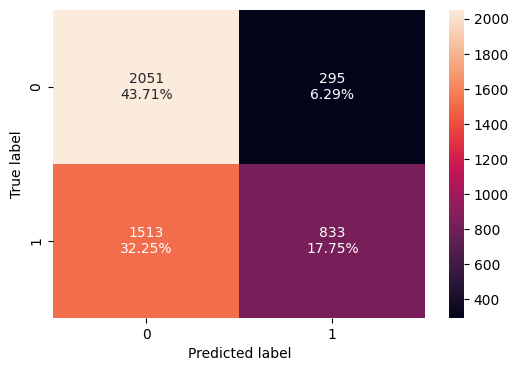

In [276]:
model_confusion_matrix(LogisticReg, X_train_selected, y_train)

### Model performance - test data

In [277]:
logistic_reg_perf_test = model_performance_classification(
    LogisticReg, X_test_selected, y_test
)
logistic_reg_perf_test

,Accuracy,Recall,Precision,F1
0,0.63,0.38,0.75,0.51


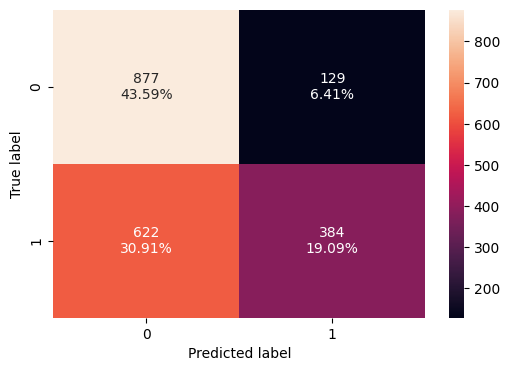

In [278]:
model_confusion_matrix(LogisticReg, X_test_selected, y_test)

## Random Forest

In [279]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_model = rf_classifier.fit(X_train, y_train)

### Random Forest Model - Training Performance

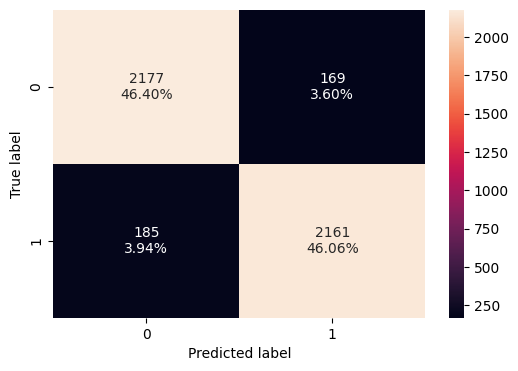

In [281]:
model_confusion_matrix(rf_model, X_train, y_train)

In [282]:
random_forest_perf_train = model_performance_classification(rf_model, X_train, y_train)
random_forest_perf_train

,Accuracy,Recall,Precision,F1
0,0.92,0.92,0.93,0.92


### Random Forest Model - Test Performance

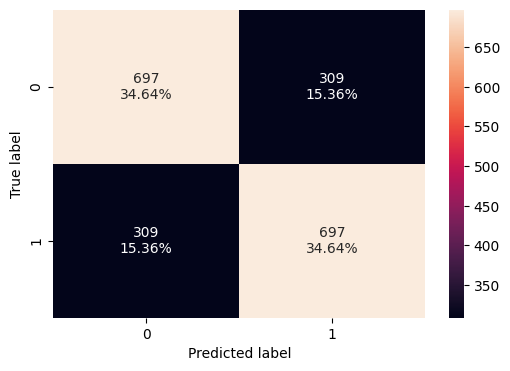

In [283]:
model_confusion_matrix(rf_model, X_test, y_test)

In [286]:
random_forest_perf_test = model_performance_classification(rf_model, X_test, y_test)
random_forest_perf_test

,Accuracy,Recall,Precision,F1
0,0.69,0.69,0.69,0.69


# **Model Performance Improvement**

* Precision (Positive Predictive Value): Important if minimizing false positives (misclassifying a non-defaulter as a defaulter) is critical.
* Recall (Sensitivity): Crucial when detecting defaults is more important (e.g., minimizing financial risk).
* F1-Score: Balances precision and recall, useful when both false positives and false negatives carry significant costs.

## Logistic Regression (deal with multicollinearity, determine optimal threshold 	using ROC curve)

### Logistic Regression - Dealing with Multicollinearity

In [287]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [288]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train_selected)
print("Variance Inflation Factors:")
print(vif_result)

Variance Inflation Factors:
                                          Variable        VIF
0                                     Total_assets        inf
1                                        Net_worth    5684.34
2                                     Total_income   36851.73
3                                   Total_expenses   34779.44
4                                 Profit_after_tax    1092.45
5                                           PBDITA     809.07
6                                              PBT    1220.57
7                                      Cash_profit     467.40
8                   PBDITA_as_perc_of_total_income       2.27
9                      PBT_as_perc_of_total_income     218.36
10                     PAT_as_perc_of_total_income     151.51
11             Cash_profit_as_perc_of_total_income      63.51
12                        PAT_as_perc_of_net_worth       1.13
13                                           Sales    6935.31
14                    Income_from_fincial_

**Note:** Drop Highly Correlated Features

In [289]:
high_vif_columns = []
for i, row in vif_result.iterrows():
    if row['VIF'] >= 5:
        high_vif_columns.append(row['Variable'])
high_vif_columns

['Total_assets',
 'Net_worth',
 'Total_income',
 'Total_expenses',
 'Profit_after_tax',
 'PBDITA',
 'PBT',
 'Cash_profit',
 'PBT_as_perc_of_total_income',
 'PAT_as_perc_of_total_income',
 'Cash_profit_as_perc_of_total_income',
 'Sales',
 'Income_from_fincial_services',
 'Total_capital',
 'Reserves_and_funds',
 'Borrowings',
 'Current_liabilities_&_provisions',
 'Shareholders_funds',
 'Cumulative_retained_profits',
 'Capital_employed',
 'TOL_to_TNW',
 'Total_term_liabilities__to__tangible_net_worth',
 'Net_fixed_assets',
 'Current_assets',
 'Net_working_capital',
 'Debt_to_equity_ratio_times',
 'Shares_outstanding',
 'EPS',
 'Adjusted_EPS',
 'Total_liabilities']

In [290]:
X_train_selected.drop(columns = high_vif_columns, axis=1, inplace=True)
X_test_selected.drop(columns = high_vif_columns, axis=1, inplace=True)

In [291]:
calculate_vif(X_train_selected)

,Variable,VIF
0,PBDITA_as_perc_of_total_income,1.03
1,PAT_as_perc_of_net_worth,1.08
2,Contingent_liabilities__to__Net_worth_perc,1.07
3,Cash_to_current_liabilities_times,1.07
4,Cash_to_average_cost_of_sales_per_day,1.07
5,Creditors_turnover,1.00
6,Debtors_turnover,1.00
7,WIP_turnover,1.00
8,Raw_material_turnover,1.00
9,Equity_face_value,1.00


In [292]:
# # Compute the correlation matrix
# corr_matrix = X_train_scaled.corr().abs()

# upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# # Find features with correlation greater than 0.99
# high_corr_pairs = [(col, idx) for col in upper_triangle.columns for idx in upper_triangle.index if upper_triangle.loc[idx, col] > 0.99]

# # Print highly correlated column pairs
# print("Highly correlated columns (correlation > 0.99):")
# for pair in high_corr_pairs:
#     print(pair)

### Training the Logistic Regression model again with only the significant features

In [293]:
LogisticReg_tuned = LogisticRegression(random_state=42)
LogisticReg_tuned.fit(X_train_selected, y_train)

LogisticRegression(random_state=42)

In [294]:
logistic_regtuned_perf_train = model_performance_classification(
    LogisticReg_tuned, X_train_selected, y_train
)
logistic_regtuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.60,0.37,0.68,0.48


### Determining optimal threshold using ROC Curve

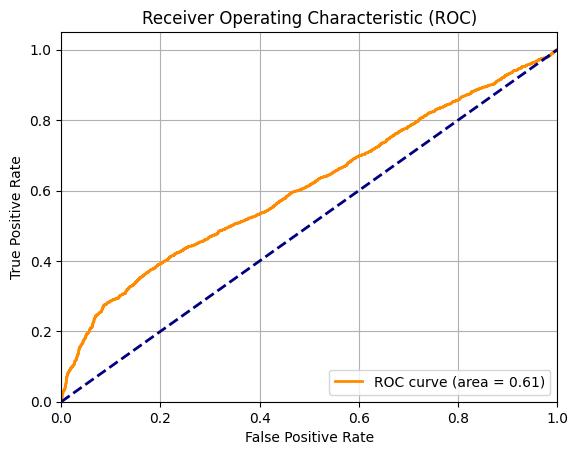

In [295]:
y_pred = LogisticReg_tuned.predict_proba(X_train_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Plot ROC curve
roc_auc = roc_auc_score(y_train, y_pred)  ## Complete the code to get the ROC-AUC score
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [296]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Compute Youden's J statistic
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.4989490949917453


### Checking tuned Logistic Regression model performance on training set

In [297]:
logistic_reg_tune_perf_train = model_performance_classification(
    LogisticReg_tuned, X_train_selected, y_train,optimal_threshold
)
logistic_reg_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.60,0.37,0.68,0.48


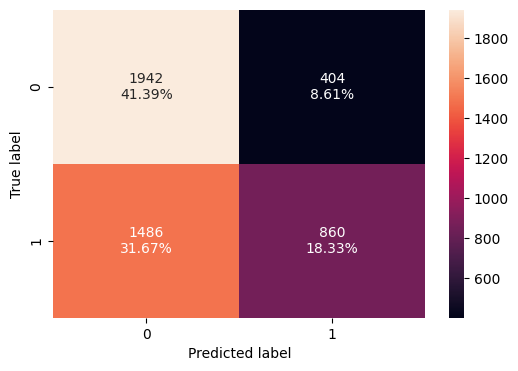

In [298]:
model_confusion_matrix(LogisticReg_tuned, X_train_selected, y_train, optimal_threshold)

### Checking tuned Logistic Regression model performance on test set

In [299]:
logistic_reg_tune_perf_test = model_performance_classification(
    LogisticReg_tuned, X_test_selected, y_test, optimal_threshold
)

logistic_reg_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.59,0.40,0.64,0.49


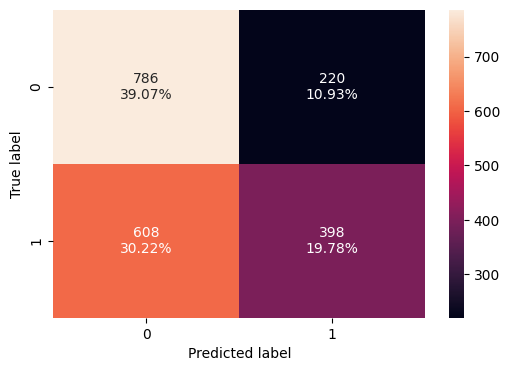

In [300]:
model_confusion_matrix(LogisticReg_tuned, X_test_selected, y_test, optimal_threshold)

## Random Forest - Hyperparameter Tuning

In [301]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 7, 9],    # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [5, 6, 7],  # Minimum number of samples required at each leaf node
}

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 200}


In [302]:
# Access the best estimator directly if needed
best_rf_classifier = grid_search.best_estimator_

In [303]:
params_used = best_rf_classifier.get_params()

# Print the parameters
print("Parameters used in the Random Forest Classifier:")
for param_name, param_value in params_used.items():
    print(f"{param_name}: {param_value}")

Parameters used in the Random Forest Classifier:
bootstrap: True
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: 9
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 6
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 200
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


### Random Forest Performance - Training Set

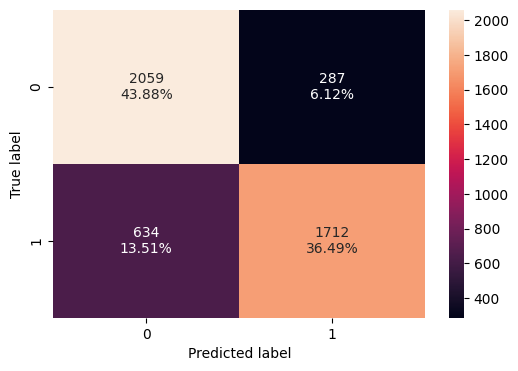

In [304]:
model_confusion_matrix(best_rf_classifier, X_train, y_train)

In [305]:
random_forest_tuned_perf_train = model_performance_classification(best_rf_classifier, X_train, y_train)
random_forest_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.80,0.73,0.86,0.79


### Random Forest Performance - Test Set

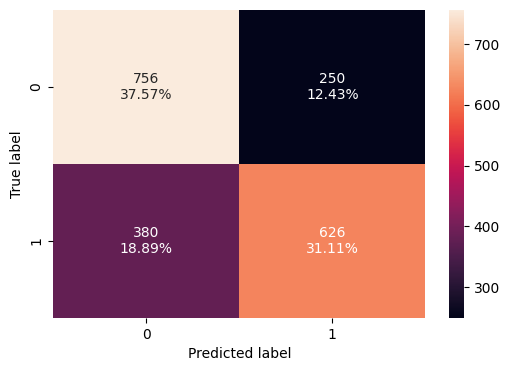

In [306]:
model_confusion_matrix(best_rf_classifier, X_test, y_test)

In [307]:
random_forest_tuned_perf_test = model_performance_classification(best_rf_classifier, X_test, y_test)
random_forest_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.69,0.62,0.71,0.67


# **Model Performance Comparison and Final Model Selection**

In [308]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        random_forest_perf_train.T,
        random_forest_tuned_perf_train.T
            ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Random Forest Base",
    "Random Forest Tuned"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Random Forest Base,Random Forest Tuned
Accuracy,0.61,0.60,0.92,0.80
Recall,0.36,0.37,0.92,0.73
Precision,0.74,0.68,0.93,0.86
F1,0.48,0.48,0.92,0.79


In [309]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_reg_perf_test.T,
        logistic_reg_tune_perf_test.T,
        random_forest_perf_test.T,
        random_forest_tuned_perf_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Random Forest Base",
    "Random Forest Tuned"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Random Forest Base,Random Forest Tuned
Accuracy,0.63,0.59,0.69,0.69
Recall,0.38,0.40,0.69,0.62
Precision,0.75,0.64,0.69,0.71
F1,0.51,0.49,0.69,0.67


###Model Selection - Random Forest

###Insights
Based on the results:
- If precision is the priority (reducing false positives), Logistic Regression Base is the best.
- If recall is the priority (reducing false negatives), Random Forest Base performs best but is likely overfitting.
- Random Forest Tuned balances accuracy, recall, and precision better than the base RF model.

**Final Selection: Random Forest Tuned**
- It has strong generalization and avoids overfitting.
- The recall (73%) is decent, ensuring we correctly identify positive cases.
- The precision (86%) is still high, avoiding false positives.

###Feature Importance in the Final Model

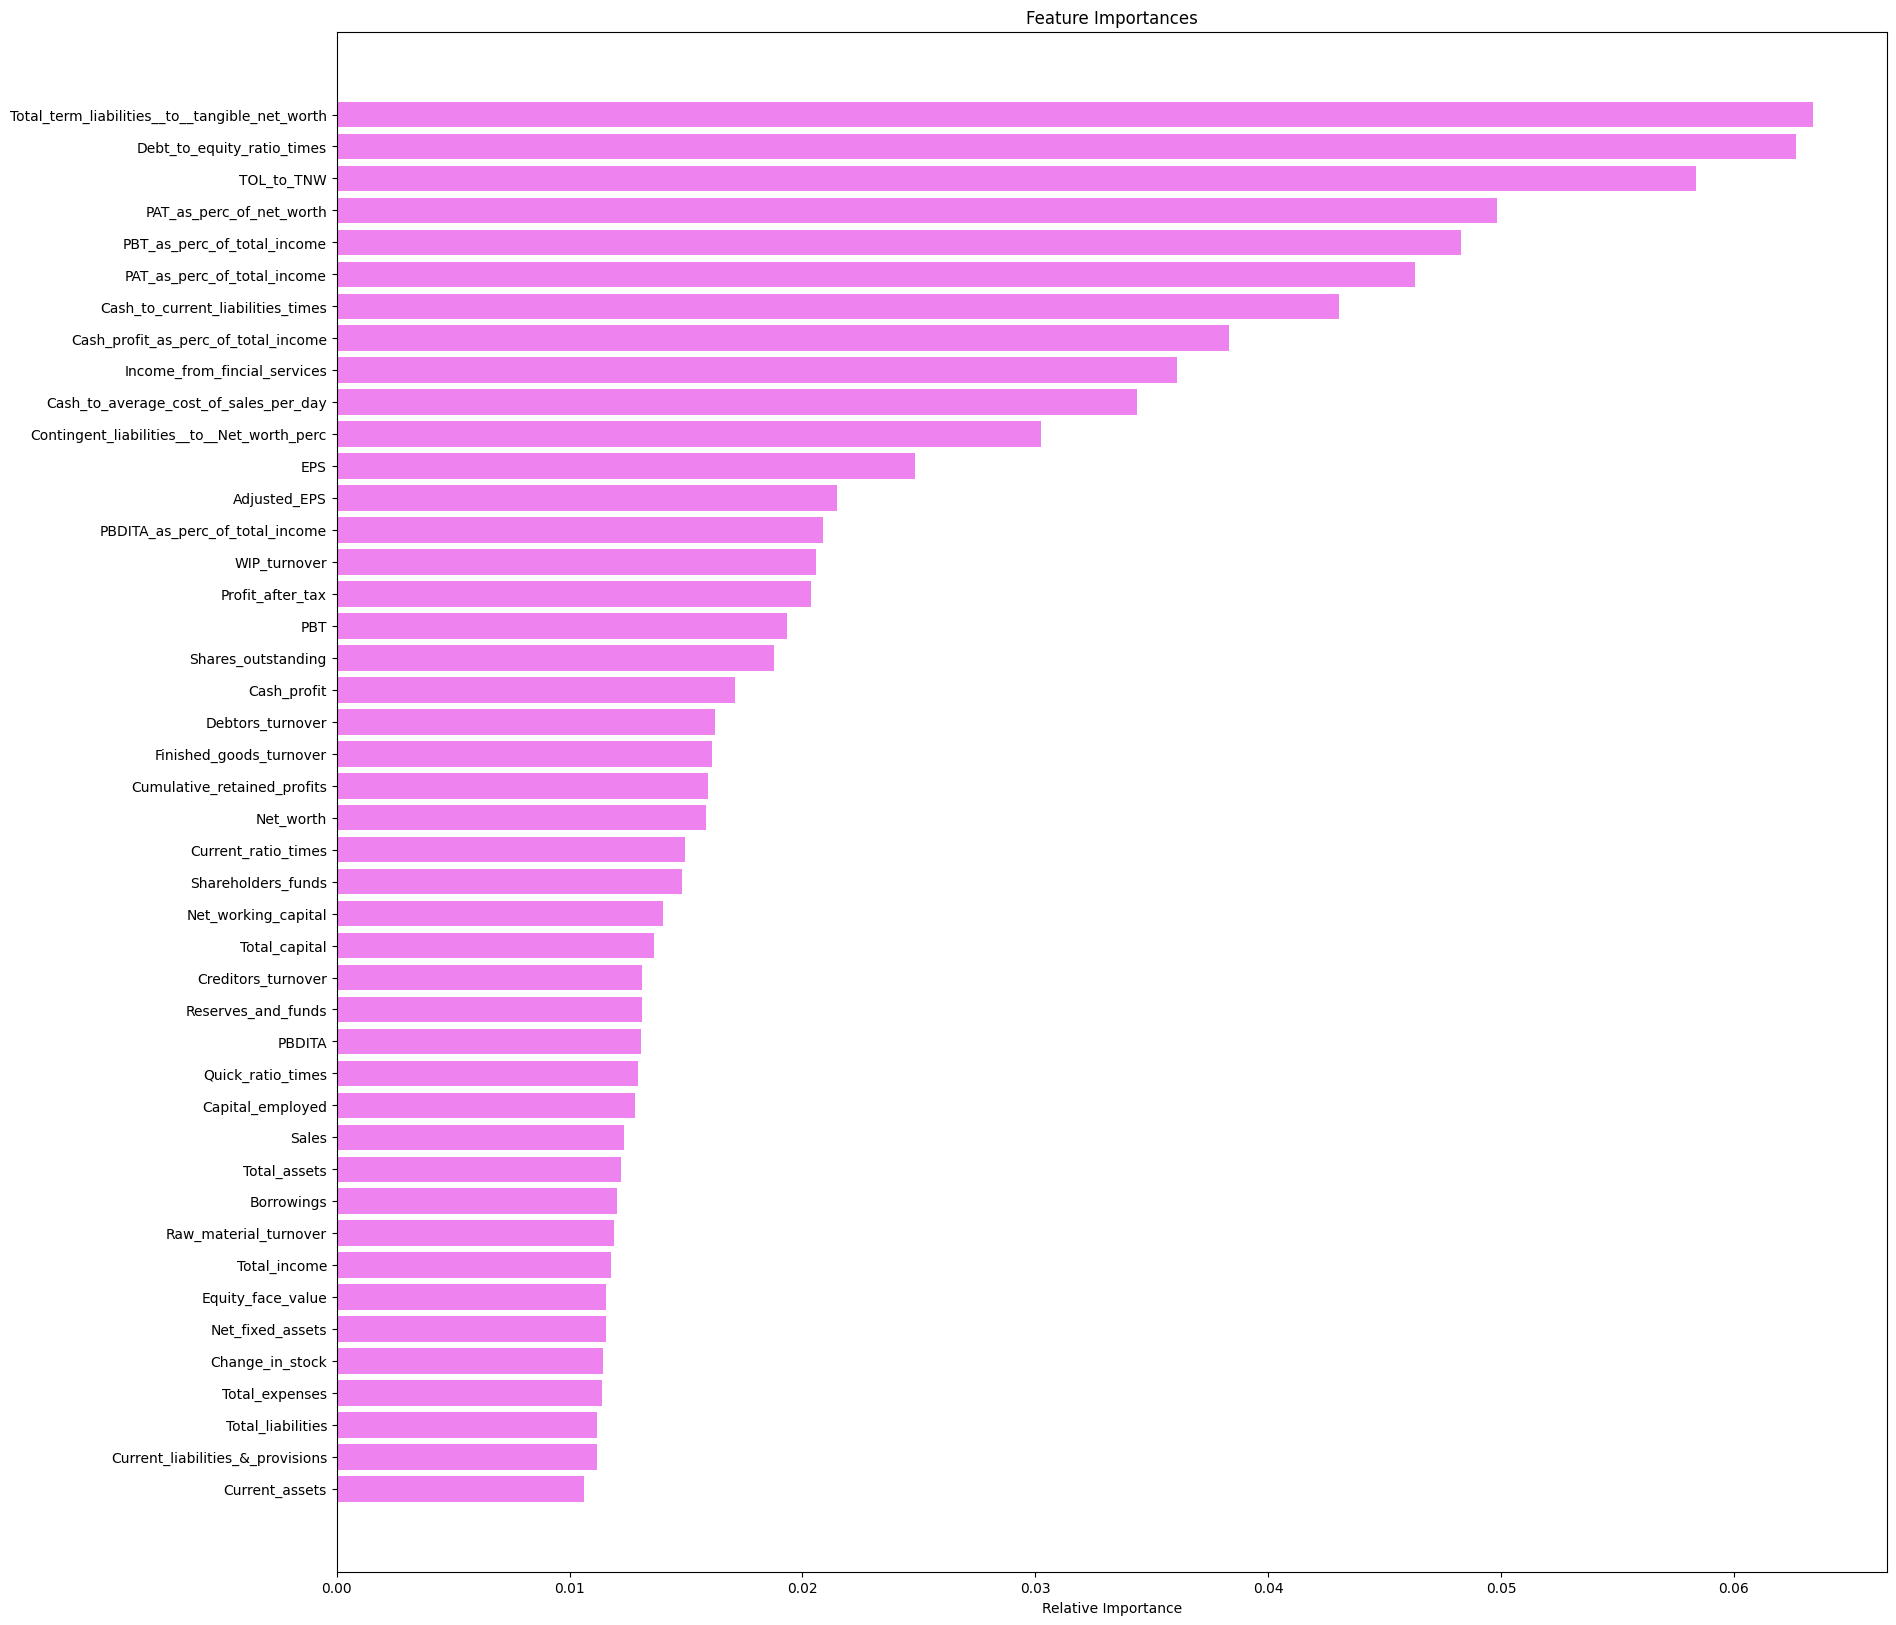

In [310]:
feature_names = X_train.columns
importances = best_rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 20))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

###Insights
Key Observations
1. Top Features Driving Predictions:
* Total Term Liabilities to Tangible Net Worth: The most important feature, indicating that a company's leverage ratio significantly impacts predictions.
* Debt to Equity Ratio (times): A key measure of financial risk, showing that companies with high leverage are more prone to classification changes.
* TOL to TNW (Total Outside Liabilities to Tangible Net Worth): Another measure of debt burden that plays a crucial role in predictions.
* PBT (Profit Before Tax) as a Percentage of Net Worth and Total Income: Indicates profitability relative to company size and revenue.
2. Cash Flow and Liquidity Metrics Matter:
* Cash to Current Liabilities (times): Highlights the importance of liquidity management.
* Cash Profit as a Percentage of Total Income: Indicates operational efficiency in generating cash.
* Cash to Average Cost of Sales per Day: Reflects how well a company can sustain operations using cash reserves.
3. Revenue and Profitability Play a Role:
* Income from Financial Services: Indicates that companies with diverse revenue streams (including financial services) impact predictions.
* Adjusted EPS (Earnings Per Share): A key profitability metric that influences classification.
* EBITDA and PBDITA (Profit Before Depreciation, Interest, Tax, and Amortization): Important profitability measures that contribute to decision-making.
4. Turnover Ratios Have Moderate Influence:
* WP (Work-in-Progress) Turnover: Suggests that companies with higher work-in-progress efficiency have better financial health.
* Debtors and Finished Goods Turnover: Indicates that how fast companies convert assets into revenue is crucial.
* Creditors Turnover: Highlights the importance of managing supplier payments efficiently.
5. Lower-Impact Features:
* Total Assets, Borrowings, and Fixed Assets: Though relevant, they have lower importance in driving predictions.
* Quick Ratio and Reserves & Funds: While useful, they don’t have as much impact as profitability and leverage ratios.

# **Actionable Insights and Recommendations**

 **Improve Financial Stability by Managing Debt & Liabilities**

High debt ratios (Debt-to-Equity, Total Term Liabilities to Tangible Net Worth) indicate financial risk.

Recommendations:

Reduce excessive borrowing and explore equity financing.
Optimize debt restructuring to lower interest costs.
Maintain a healthy debt-equity balance to attract investors.

**Focus on Profitability for Sustainable Growth**

Key Profitability Indicators: PBT %, Adjusted EPS, EBITDA.

Recommendations:

Improve operational efficiency to maximize profit margins.
Implement cost control measures and pricing strategies.
Leverage automation and technology for productivity improvements.

**Strengthen Liquidity & Cash Flow Management**

Critical Factors: Cash to Liabilities, Cash Profit %, Cash to Cost of Sales.

Recommendations:

Maintain strong cash reserves to handle economic downturns.
Optimize accounts receivable management for faster cash inflows.
Reduce unnecessary expenses by negotiating better supplier terms.


**Enhance Operational Efficiency & Asset Utilization**

Turnover Ratios (Debtors, Creditors, Finished Goods, WIP) impact financial health.

Recommendations:

Implement inventory optimization to prevent overstocking.
Strengthen supply chain management to reduce costs.
Improve collections strategy to enhance working capital.

**Optimize Capital Structure for Long-Term Growth**

Net Worth, Shareholders’ Funds, Total Capital influence investor confidence.

Recommendations:

Diversify funding sources to reduce reliance on debt.
Reinvest profits into high-growth areas for expansion.
Improve investor relations with financial transparency.